In [30]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [31]:
# IMPORT LIBRARIES AND NOISE DATA FILE
import csv, glob, os, sys, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from theano.tensor.signal.pool import pool_2d
from sknn.mlp import Regressor, Layer
from sklearn.preprocessing import StandardScaler 
from scipy import stats; from sklearn import preprocessing
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import train_test_split
from timeit import default_timer as timer
from sklearn.model_selection import KFold

def MSE(y,y0): #create mean-square error function to calculate ANN performance
    if len(y.shape) > 1:
        y = np.squeeze(y)
    if len(y0.shape) > 1:
        y0 = np.squeeze(y0)
    return (np.average((y - y0)**2))/np.average(y)*100


plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

#################################################################
file = '2017-11-10 mxeneh ann dataset.txt' #CorrEl NOISE filename
#################################################################
raw_data = pd.read_table(file, sep='\t') #read in file
print(raw_data)

         time_min     r_raw  rh_setpoint     f_raw
0        0.000000  0.000000          0.0   0.00000
1        0.350003  0.004230          0.0  -0.00610
2        0.700006  0.004130          0.0  -0.05981
3        1.050010 -0.003410          0.0  -0.01828
4        1.400013  0.000730          0.0   0.02326
5        1.750000  0.005600          0.0  -0.07806
6        2.100003 -0.001430          0.0   0.05873
7        2.450006  0.008270          0.0  -0.04257
8        2.800010 -0.000255          0.0  -0.00101
9        3.150013 -0.004750          0.0  -0.00706
10       3.500000 -0.006990          0.0  -0.01310
11       3.850003  0.002120          0.0   0.02848
12       4.200006  0.002810          0.0  -0.02517
13       4.550010  0.005520          0.0   0.01643
14       4.900013 -0.000173          0.0  -0.03721
15       5.250000  0.001160          0.0   0.05202
16       5.600003 -0.003370          0.0  -0.04923
17       5.950007 -0.003910          0.0  -0.00761
18       6.300010  0.006000    

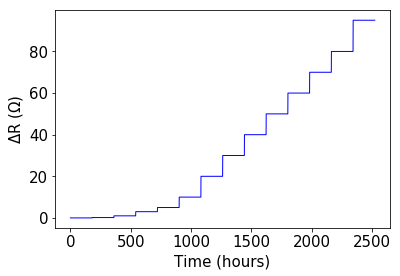

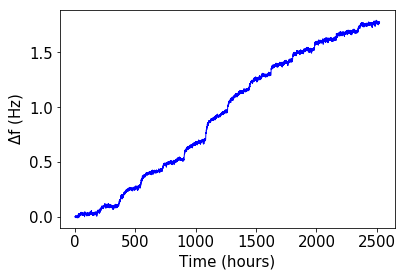

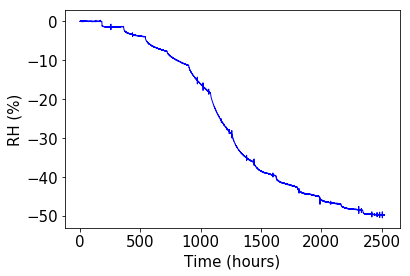

In [32]:
# ORGANIZE AND PLOT STANDARD DEVIATION VS. TIME DATA FROM NOISE FILE
raw_time = np.array(raw_data['time_min'])
r_raw = np.array(raw_data['r_raw'])
f_raw = np.array(raw_data['f_raw'])
rh_setpoint = np.array(raw_data['rh_setpoint'])

plot_vars = [rh_setpoint, r_raw, f_raw] #list for plotting
ylabels = ['$\Delta$R ($\Omega$)', '$\Delta$f (Hz)', 'RH (%)'] #list for y labels of plots
for i in range(len(plot_vars)):
    plt.plot(raw_time, plot_vars[i], color='b', linewidth=1) #plot data
    plt.xlabel('Time (hours)', fontsize=15); plt.ylabel(ylabels[i], fontsize=15)
    plt.show()

In [39]:
#find time relative to pressure changes

edgeindices = np.array([])
rel_time = np.array([])

for i in range(len(rh_setpoint)-1):
    if rh_setpoint[i] != rh_setpoint[i+1]:
        edgeindices = np.append(edgeindices, i+1)   
    else: pass
    
    
print(edgeindices)

rel_time = np.copy(raw_time)

for i in range(len(edgeindices)-1):
    print(edgeindices[i+1] - edgeindices[i])
    edge_diff = int(edgeindices[i+1] - edgeindices[i])
    
rel_time = np.repeat(raw_time[:edge_diff], len(edgeindices)+1)
raw_time = raw_time[1:]
    
print(len(raw_time))
print(len(rel_time))
plt.plot(raw_time, rel_time)
plt.show()


[  517.  1031.  1546.  2061.  2576.  3091.  3606.  4121.  4636.  5151.
  5666.  6181.  6696.]
514.0
515.0
515.0
515.0
515.0
515.0
515.0
515.0
515.0
515.0
515.0
515.0
7209
7210


ValueError: x and y must have same first dimension, but have shapes (7209,) and (7210,)

In [8]:
# IMPORT PRESSURE DATA
pressurefile = 'C:\\Users\\a6q\\Desktop\\CorrEL noise measurements\\2017-07-19 s-swcnt 7c noise under h2o'
pressuredata = pd.read_csv(pressurefile, delimiter = '\t')# skiprows=fline1, header=0, error_bad_lines=False, sep='\s+') #read in file
#fdata = fdata0.apply(pd.to_numeric, errors='coerce').dropna() #change from string to float, coercing to NaN 
print(pressuredata)

                   date_time  elapsed_time_min  J-KEM_temp_C  \
0     2017-07-19 12:30:14.20          0.377088          27.5   
1     2017-07-19 12:30:31.40          0.663738          27.5   
2     2017-07-19 12:30:48.60          0.950354          27.6   
3     2017-07-19 12:31:05.80          1.237071          27.5   
4     2017-07-19 12:31:23.00          1.523787          27.5   
5     2017-07-19 12:31:40.20          1.810470          27.4   
6     2017-07-19 12:31:57.41          2.097153          27.5   
7     2017-07-19 12:32:14.61          2.383836          27.5   
8     2017-07-19 12:32:31.81          2.670519          27.5   
9     2017-07-19 12:32:49.01          2.957269          27.5   
10    2017-07-19 12:33:06.22          3.243986          27.5   
11    2017-07-19 12:33:23.42          3.530702          27.5   
12    2017-07-19 12:33:40.62          3.817385          27.5   
13    2017-07-19 12:33:57.82          4.104101          27.5   
14    2017-07-19 12:34:15.02          4.

[5746 rows x 23 columns]


training time (min) =  2.026 , testing MSE (%) =  141.506
average absolute error (%) =  4.538


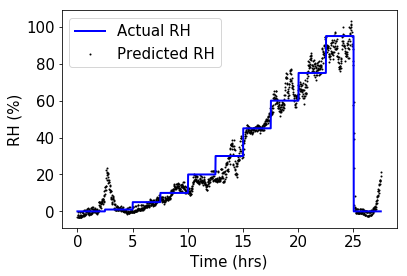

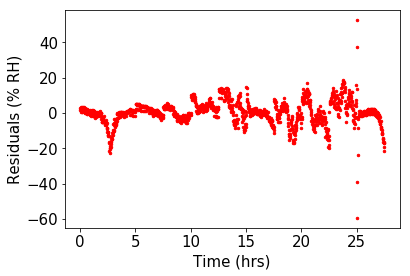

In [36]:
# USE NEURAL NET REGRESSOR TO PREDICT PRESSURE USING NOISE DATA
NNstarttime = timer() #start timer to monitor training time

NNpnts = 1250 #len(vmatch) #number of points to sample for ANN analysis
ptime_short = ptime[::int(len(vmatch)/NNpnts)] #slice to reduce number of data points
vmatch_short = vmatch[::int(len(vmatch)/NNpnts)] 
imatch_short = imatch[::int(len(imatch)/NNpnts)]
pmatch_short = pmatch[::int(len(pmatch)/NNpnts)]
rh_short = rh[::int(len(rh)/NNpnts)]

############## standardize data by subtracting mean and dividing by st. dev. ###########
vmatch_st = np.divide(np.subtract(vmatch_short,np.mean(vmatch_short)),np.std(vmatch_short))
imatch_st = np.divide(np.subtract(imatch_short,np.mean(imatch_short)),np.std(imatch_short))
pmatch_st = np.divide(np.subtract(pmatch_short,np.mean(pmatch_short)),np.std(pmatch_short))
rh_st = np.divide(np.subtract(rh_short,np.mean(rh_short)),np.std(rh_short))

inputlist = (vmatch_st, imatch_st)# insert data to be used as columns for input matrix
targetlist = (rh_st) #insert data to be used as columns for target matrix

#create input matrix and target matrix for feeding into ANN
inputmatrix = np.array(inputlist).T if len(np.shape(inputlist)) > 1 else np.array(inputlist) 
targetmatrix = np.array(targetlist).T if len(np.shape(targetlist)) > 1 else np.array(targetlist)
targetmatrix = targetmatrix.reshape(-1,1)

actual = np.array([]); prediction = np.array([]) #empty arrays for appending ANN results at each k-fold
errors_raw = np.array([]); tar_times = np.array([])

nn = Regressor(layers=[
        Layer('Sigmoid', units=14), # design network with hidden layers
        Layer('Sigmoid', units=5),
        Layer('Sigmoid', units=2),
        Layer('Linear')], #output layer
    learning_rate=0.02, n_iter=1000)
kf = KFold(n_splits=5, shuffle=True) # k-fold validation for ANN testing

for train_index, test_index in kf.split(inputmatrix): #split into k test/train sets and loop oever each one
    inp_train, inp_test = inputmatrix[train_index], inputmatrix[test_index]
    tar_train, tar_test = targetmatrix[train_index], targetmatrix[test_index]

    nn.fit(inp_train, tar_train) #train network
    prediction_raw = nn.predict(inp_test) #make predictions (still standardized)

    prediction0 = np.add(np.multiply(np.std(rh_short),prediction_raw),np.mean(rh_short)) #unstandardize prediction
    actual0 = np.add(np.multiply(np.std(rh_short),tar_test),np.mean(rh_short)) #unstandardize actual target
    prediction = np.append(prediction, prediction0) #build predictions
    actual = np.append(actual, actual0) #build actual targets
    errors_raw = np.append(errors_raw, np.subtract(actual0, prediction0)) #calculate prediction errors
    tar_times = np.append(tar_times, ptime_short[test_index]) #make array of times that correspond to testing points

    #print(nn.get_parameters()) #summarize network parameters

NNendtime = timer(); NNtime = (NNendtime - NNstarttime) / 60 #total training time in minutes
print('training time (min) = ', round(NNtime,3), ', testing MSE (%) = ', round(MSE(actual, prediction),3))
print('average absolute error (%) = ', round(np.mean(np.abs(errors_raw)),3))

plt.plot(ptime_short, rh_short, c='b', linewidth=2, label='Actual RH') #plot pressure / RH
plt.scatter(tar_times, prediction, c='k', s=1, label='Predicted RH') #plot predictions
plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel('RH (%)', fontsize=15)
plt.legend(loc='upper left', fontsize=15); plt.show()

plt.scatter(tar_times, errors_raw, c='r', s=6) #plot errors
plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel('Residuals (% RH)', fontsize=15)
plt.show()

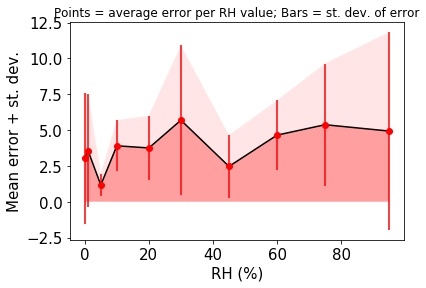

RH values =  [  0.   1.   5.  10.  20.  30.  45.  60.  75.  95.]
avg errors =  [ 3.02  3.57  1.16  3.9   3.75  5.69  2.46  4.65  5.37  4.93]
error st. dev. =  [ 4.59  3.91  0.8   1.79  2.25  5.21  2.18  2.42  4.27  6.9 ]


In [35]:
# Analyze ANN errors
rhvalues = np.unique(actual)
errormean, errorstd = np.array([]), np.array([])
for i in rhvalues: #look through each individual RH value
    error00 = np.array([])
    for j in range(len(errors_raw)): #collect errors at each RH to average them as a function of RH
        if i == actual[j]: error00 = np.append(error00, errors_raw[j]) 
    errormean = np.append(errormean, np.mean(np.abs(error00)))
    errorstd = np.append(errorstd, np.std(np.abs((error00))))

plt.errorbar(rhvalues, errormean, yerr=errorstd, fmt='o', c='r')
plt.plot(rhvalues, errormean, c='k')
plt.fill_between(rhvalues, 0, errormean+errorstd, facecolor='red', alpha=.1, interpolate=True)
plt.fill_between(rhvalues, 0, errormean, facecolor='red', alpha=.3, interpolate=True)


plt.xlabel('RH (%)', fontsize=15); plt.ylabel('Mean error + st. dev.', fontsize=15)
plt.title('Points = average error per RH value; Bars = st. dev. of error')
plt.show()

print('RH values = ', rhvalues)
print('avg errors = ', np.around(errormean, decimals=2))
print('error st. dev. = ', np.around(errorstd, decimals=2))

In [26]:
len(vmatch_st)
#%store errormean

5746

# SAVE NN RESULTS TO CSV FILE

NNfile = "NNresults.csv"
saveNNdata = []; NNheaders = []; savetar = []

#see if input/target lists are multi-dimensional and reshape if necessary
#save test inputs:
if len(np.shape(inputlist)) > 1:
    for i in range(len(inputlist)):
        saveNNdata.append(zip(*inp_test)[i])
        NNheaders.append('test_input' + str(i+1))
else:
    saveNNdata.append(np.reshape(inp_test,len(inp_test)))
    NNheaders.append('test_input')
    
#save test targets and predictions:
if len(np.shape(targetlist)) > 1:
    for i in range(len(targetlist)):
        saveNNdata.append(zip(*tar_test)[i]) 
        NNheaders.append('test_target' + str(i+1))
        saveNNdata.append(zip(*prediction)[i])
        NNheaders.append('prediction' + str(i+1))
else:
    saveNNdata.append(np.reshape(tar_test,len(tar_test)))
    NNheaders.append('test_target')
    saveNNdata.append(np.reshape(prediction, len(tar_test)))
    NNheaders.append('prediction')
                        
saveNNdata = zip(*saveNNdata)
#open CSV file
with open(NNfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerow(NNheaders) #write headers
    for row in saveNNdata:
        writer.writerow(row)

#grid search optimizes network among the choices you give it:
'''
gs = GridSearchCV(nn, param_grid={
    'learning_rate': [0.05, 0.01, 0.005, 0.001],
    'hidden0__units': [4,8,12]
    'hidden0__type': ['Rectifier', 'Sigmoid', 'Tanh']})
gs.fit(X,y)
'''
# or among random parameters:
'''
gs = RandomizedSearchCV(nn, param_distributions={
    'learning_rate': stats.uniform[0.001, 0.1],
    'hidden0__units': stats.radint[3,15],
    'hidden0__type': ['Rectifier', 'Sigmoid', 'Tanh']})
gs.fit(X,y)
'''
#to save trained network:
#pickle.dump(nn, open('nn.pk1', 'wb'))

#to load trained network:
# nn = pickel.load(open('nn.pk1', 'rb'))

